In [1]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

ModuleNotFoundError: No module named 'masquer'

# Algorithmes génétiques

Basé sur le sujet d'informatique du concours centrale supelec 2017

## Choix de points au hasard  
  
1. Afin de disposer de données pour tester les différents algorithmes de calcul de chemin qui seront développés plus tard, écrire une fonction qui construit une exploration au hasard. Cette fonction d’entête
```python
def générer_PI(n:int, cmax:int) -> np.ndarray:
```
prend en paramètres le nombre de points d’intérêts à générer et la largeur de la zone d’exploration (supposée carrée) et renvoie un objet de type numpy.ndarray contenant les coordonnées de n points deux à deux distincts choisis au hasard dans la zone d’exploration.
2. Quelles contraintes doivent vérifier les arguments de la fonction générer_PI ?

In [14]:
#Question 1.
import random as rd

def generer_PI(n, cmax):
    """
    renvoie une liste de points (couples d'entiers) distincts
    
    n est un int c'est le nombre de points
    cmax est un int c'st la largeur de l'image (image carrée)
    """
    assert n <= cmax**2
    L = []
    while len(L) < n:
        x = rd.randint(0,cmax-1)
        y = rd.randint(0,cmax-1)
        while (x,y) in L:
            x = rd.randint(0,cmax-1)
            y = rd.randint(0,cmax-1)
        L.append((x,y))
    return L

PI = generer_PI(10,100)

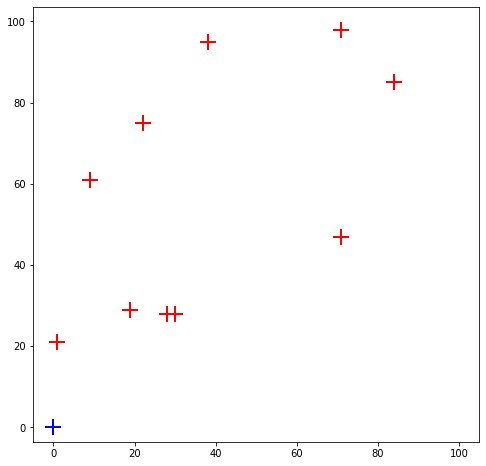

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure("PI", figsize=(8,8))
plt.plot([val[0]for val in PI],[val[1] for val in PI], "+", markersize = 16, markeredgewidth=2, color= "red")
plt.plot(0,0,"+", markersize = 16, markeredgewidth=2, color= "blue")
plt.axis('equal')
plt.xlim([-5,105])
plt.ylim([-5,105])

plt.show()

In [20]:
import numpy as np

def calculer_distances(PI):
    dist = np.zeros((len(PI)+1,len(PI)+1))
    PI2 = [(0,0)] + PI
    for i in range(len(PI2)):
        for j in range (i+1, len(PI2)):
            dist[i,j] = ((PI2[i][0] - PI2[j][0])**2 + (PI2[i][1] - PI2[j][1])**2)**0.5
            dist[j,i] = dist[i,j] 
    return dist

d = calculer_distances(PI)    

In [21]:
def longeur_chemin(chemin, d):
    dist = 0
    for i in range(1, len(chemin)):
        dist += d[chemin[i-1], chemin[i]]
    return dist

chemin = [0,1,2,3,4,5,6,7,8,9,10]
longeur_chemin(chemin,d)

575.3181223977854

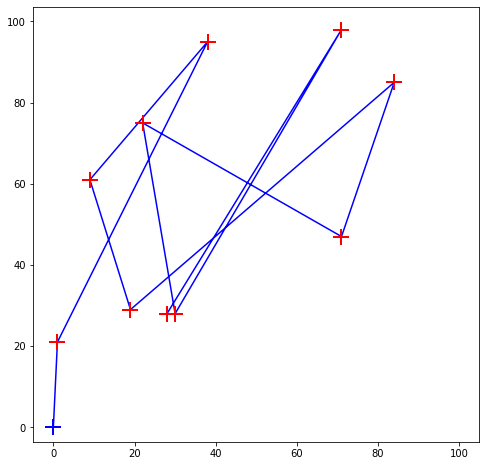

In [28]:
PI2 = [(0,0)] + PI
plt.figure("PI2", figsize=(8,8))
plt.plot([PI2[val][0] for val in chemin],[PI2[val][1] for val in chemin], "blue" )
plt.plot([val[0]for val in PI],[val[1] for val in PI], "+", markersize = 16, markeredgewidth=2, color= "red")
plt.plot(0,0,"+", markersize = 16, markeredgewidth=2, color= "blue")
plt.axis('equal')
plt.xlim([-5,105])
plt.ylim([-5,105])

plt.show()

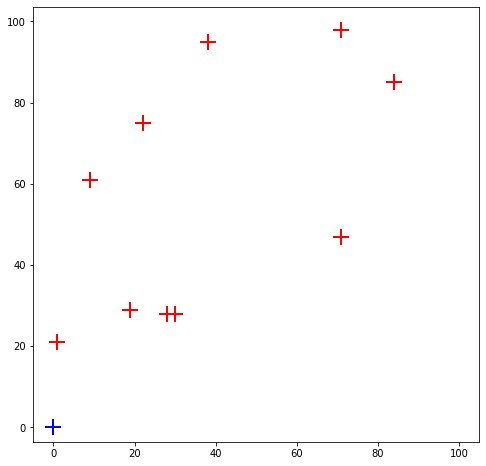

In [25]:
plt.figure("PI", figsize = (8,8))

plt.plot([val[0]for val in PI],[val[1] for val in PI], "+", markersize = 16, markeredgewidth=2, color= "red")
plt.plot(0,0,"+", markersize = 16, markeredgewidth=2, color= "blue")
plt.axis('equal')
plt.xlim([-5,105])
plt.ylim([-5,105])

plt.show()

In [19]:
def normaliser_chemin(chemin, n):
    chemin_valide = []
    points_manquants = [i for i in range(n)]
    for val in chemin:
        if val not in chemin_valide:
            chemin_valide.append(val)
            points_manquants.remove(val)
    return chemin_valide + points_manquants

normaliser_chemin([0,7,9,9,0,1,2,5,6,5,5,1],10)

[0, 7, 9, 1, 2, 5, 6, 3, 4, 8]

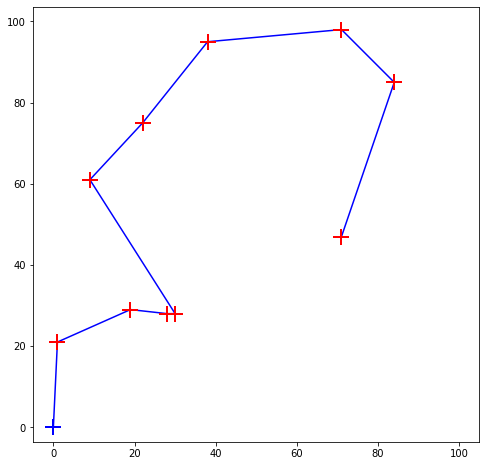

In [29]:
def plus_proche_voisin(d):
    c = [0]
    m = np.max(d) + 1
    for i in range(len(d)-1):
        mini = m
        for j in range(len(d[0,:])):
            if j not in c and d[c[-1],j] < mini:
                p = j
                mini = d[c[-1],j]
        c.append(p)
    return c

c = plus_proche_voisin(d)
PI2 = [(0,0)] + PI
PI2 = [PI2[val] for val in c]
plt.figure("PI2", figsize= (8,8))
plt.plot([PI2[val][0] for val in chemin],[PI2[val][1] for val in chemin], "blue" )
plt.plot([val[0]for val in PI],[val[1] for val in PI], "+", markersize = 16, markeredgewidth=2, color= "red")
plt.plot(0,0,"+", markersize = 16, markeredgewidth=2, color= "blue")
plt.axis('equal')
plt.xlim([-5,105])
plt.ylim([-5,105])

plt.show()

Afin de faciliter l’application des différents algorithmes de recherche de chemin, on souhaite construire un tableau des distances entre les différents points d’intérêt d’une exploration et entre ceux-ci et la position courante du robot au moment du calcul. 

3. Écrire une fonction d’entête
```python
def calculer_distances(PI:np.ndarray) -> np.ndarray:
```
qui prend en paramètre un tableau de n points d’intérêt tel que décrit précédemment et renvoie un tableau de nombres flottants, de dimension (n + 1) × (n + 1), tel que l’élément d’indice i,j fournit la distance entre les points d’intérêt i et j, l’indice n désignant le point de départ du robot. La position initiale du robot pour n = 0 est (0,0)


4. Écrire une fonction d’entête
```python
def longueur_chemin(chemin:list, d:np.ndarray) -> float:
```
qui prend en paramètre un chemin à parcourir et la matrice des distances entre points d’intérêt (telle que renvoyée par la fonction calculer_distances) et renvoie la distance que doit effectuer le robot pour suivre ce chemin en partant de sa position courante (correspondant à la dernière ligne/colonne du tableau d) et en visitant tous les points d’intérêt dans l’ordre indiqué.

## Normalisation d’un chemin
5. Écrire une fonction d’entête
```python
def normaliser_chemin(chemin:list, n:int) -> list:
```
qui prend en paramètre une liste d’entiers et renvoie une liste correspondant à un chemin valide, c’est-à-dire contenant une seule fois tous les entiers entre 0 et n (exclu). Pour cela cette fonction commence par supprimer les éventuels doublons (en ne conservant que la première occurrence) et les valeurs supérieures ou égales à n, sans modifier l’ordre relatif des éléments conservés, puis ajoute à la fin les éventuels éléments manquants en ordre croissant de numéros.

## Force brute
Pour rechercher le plus court chemin, on peut imaginer de considérer tous les chemins possibles et de calculer leur longueur. On obtiendra ainsi à coup sûr le chemin le plus court.
6. Déterminer en fonction de n, nombre de points à visiter, le nombre de chemins possibles passant exactement une fois par chacun des points.  
  
7. Cet algorithme est-il utilisable pour une zone d’exploration contenant 20 points d’intérêts ? Justifier.  
  
## Algorithme du plus proche voisin
Une idée simple pour obtenir un algorithme utilisable est de construire un chemin en choisissant systématiquement le point, non encore visité, le plus proche de la position courante.  
  
8. Écrire une fonction d’entête
```python
def plus_proche_voisin(d:np.ndarray) -> list:
```
qui prend en paramètre le tableau des distances résultat de la fonction calculer_distances et fournit un chemin d’exploration en appliquant l’algorithme du plus proche voisin.

9. Quelle est la complexité temporelle de l’algorithme du plus proche voisin en considérant que cet algorithme est constitué des deux fonctions calculer_distances et plus_proche_voisin ?  


10. En considérant les trois points de coordonnées (0, 0), (0, 3000), (0, 7000) et en choisissant un point de départ adéquat pour le robot, montrer que l’algorithme du plus proche voisin ne fournit pas nécessairement le plus court chemin.  
  
Dans la pratique, on constate que, dès que le nombre de points d’intérêt devient important, l’algorithme du plus proche voisin fournit un chemin qui peut être 50% plus long que le plus court chemin.

## Deuxième approche : algorithme génétique
Les algorithmes génétiques s’inspirent de la théorie de l’évolution en simulant l’évolution d’une population. Ils font intervenir cinq traitements.

#### 1. Initialisation
Il s’agit de créer une population d’origine composée de m individus (ici des chemins pour l’exploration à planifier). Généralement la population de départ est produite aléatoirement.
#### 2. Évaluation
Cette étape consiste à attribuer à chaque individu de la population courante une note correspondant à sa capacité à répondre au problème posé. Ici la note sera simplement la longueur du chemin.
#### 3. Sélection
Une fois tous les individus évalués, l’algorithme ne conserve que les « meilleurs » individus. Plusieurs méthodes de sélection sont possibles : choix aléatoire, ceux qui ont obtenu la meilleure note, élimination par tournoi, etc.
#### 4. Croisement
Les individus sélectionnés sont croisés deux à deux pour produire de nouveaux individus et donc une nouvelle population. La fonction de croisement (ou reproduction) dépend de la nature des individus.
#### 5. Mutation
Une proportion d’individus est choisie (généralement aléatoirement) pour subir une mutation, c’est-à-dire une transformation aléatoire. Cette étape permet d’éviter à l’algorithme de rester bloqué sur un optimum
local.  
  
En répétant les étapes de sélection, croisement et mutation, l’algorithme fait ainsi évoluer la population, jusqu’à trouver un individu qui réponde au problème initial. Cependant dans les cas pratiques d’utilisation des algorithmes génétiques, il n’est pas possible de savoir simplement si le problème est résolu (le plus court chemin figure-t-il dans ma population ?). On utilise donc des conditions d’arrêt heuristiques basées sur un critère arbitraire.  
  
Le but de cette partie est de construire un algorithme génétique pour rechercher un meilleur chemin d’exploration que celui obtenu par l’algorithme du plus proche voisin.

### Initialisation et évaluation
Une population est représentée par une liste d’individus, chaque individu étant représenté par un couple (longueur, chemin) dans lequel:
- chemin désigne un chemin représenté comme précédemment par une liste d’entiers correspondant aux indices des points d’intérêt dans le tableau des distances produit par la fonction calculer_distances ;
- longueur est un entier correspondant à la longueur du chemin, en tenant compte de la position de départ du robot (0,0).  
  
  
  
11. Écrire une fonction d’entête
```python
def créer_population(m:int, d:np.ndarray) -> list:
```
qui crée une population de m individus aléatoires. Cette fonction prend en paramètre le nombre d’individus à engendrer et le tableau des distances entre points d’intérêt (et la position courante du robot) tel que produit par la fonction calculer_distances. Elle renvoie une liste d’individus, c’est-à-dire de couples (longueur, chemin).

### Sélection
12. Écrire une fonction d’entête
```python
def réduire(p:list) -> None:
```
qui réduit une population de moitié en ne conservant que les individus correspondant aux chemins les plus courts. On rappelle que p est une liste de couples (longueur, chemin). La fonction réduire ne renvoie pas de résultat mais modifie la liste passée en paramètre.

### Mutation
13. Écrire une fonction d’entête
```python
def muter_chemin(c:list) -> None:
```
qui prend en paramètre un chemin et le transforme en inversant aléatoirement deux de ses éléments.

14. Écrire une fonction d’entête
```python
def muter_population(p:list, proba:float, d:np.ndarray) -> None:
```
qui prend en paramètre une population dont elle fait muter un certain nombre d’individus. Le paramètre proba (compris entre 0 et 1) désigne la probabilité de mutation d’un individu. Le paramètre d est la matrice des distances entre points d’intérêt.

### Croisement
14. Écrire une fonction d’entête
```python
def croiser(c1:list, c2:list) -> list:
```
qui crée un nouveau chemin à partir de deux chemins passés en paramètre. Ce nouveau chemin sera produit en prenant la première moitié du premier chemin suivi de la deuxième moitié du deuxième puis en « normalisant » le chemin ainsi obtenu.
15. Écrire une fonction d’entête
```python
def nouvelle_génération(p:list, d:np.ndarray) -> None:
```
qui fait grossir une population en croisant ses membres pour en doubler l’effectif. Pour cela, la fonction fait se reproduire tous les couples d’individus qui se suivent dans la population (p[i], p[i+1]) et (p[m-1], p[0]) de façon à produire m nouveaux individus qui s’ajoutent aux m individus de la population de départ.

### Algorithme complet
16. Écrire une fonction d’entête
```python
def algo_génétique(PI:np.ndarray, m:int, proba:float, g:int) -> float, list:
```
qui prend en paramètre un tableau de points d’intérêts (figure 2), la taille m de la population, la probabilité de mutation proba et le nombre de générations g. Cette fonction implante un algorithme génétique à l’aide des différentes fonctions écrites jusqu’à présent et renvoie la longueur du plus court chemin d’exploration et le
chemin lui-même obtenus au bout de g générations.
17. Est-il possible avec l’implantation réalisée, qu’une itération de l’algorithme dégrade le résultat : le meilleur chemin obtenu à la génération n + 1 est plus long que celui de la génération n ? Dans l’affirmative, comment modifier le programme pour que cette situation ne puisse plus arriver ?
18.  Quelles autres conditions d’arrêt peut-on imaginer ? Établir un comparatif présentant les avantages et inconvénients de chaque condition d’arrêt envisagée.